In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns
import numpy as np
import numpy.ma as ma
from shapely.geometry import mapping, box
from rasterio.plot import plotting_extent
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

sns.set_style('white')
sns.set(font_scale=1.5)

data1 = et.data.get_data('cold-springs-fire')
data2 = et.data.get_data('cs-test-landsat')
os.chdir(os.path.join(et.io.HOME, 
                      'earth-analytics', 
                      'data'))

Extracted output to /home/codespace/earth-analytics/data/cs-test-landsat/.


In [2]:
def combine_tifs(tif_list):
    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return xr.concat(out_xr, dim="band")

In [3]:
all_landsat_bands_path = glob(os.path.join("cold-springs-fire",
                                           "landsat_collect",
                                           "LC080340322016072301T1-SC20180214145802",
                                           "crop",
                                           "*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_post_fire = combine_tifs(all_landsat_bands_path)

extent_landsat = plotting_extent(
    landsat_post_fire[0].values, landsat_post_fire.rio.transform())

landsat_post_fire

<xarray.DataArray (band: 3, y: 177, x: 246)> Size: 523kB
array([[[2445., 2271., 2417., ..., 1734., 1904., 2101.],
        [2662., 2465., 2532., ..., 1736., 1824., 2165.],
        [2880., 2872., 2750., ..., 1897., 2116., 2300.],
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  5571
    STATISTICS_MEAN:     1958.570001378
    STATISTICS_MINIMUM:  -2
    STATISTICS_STDDEV:   557.005903918
    scale_factor:        1.0
    add_offset:          0.0

In [4]:
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

fire_bound_utmz13 = fire_boundary.to_crs(landsat_post_fire.rio.crs)

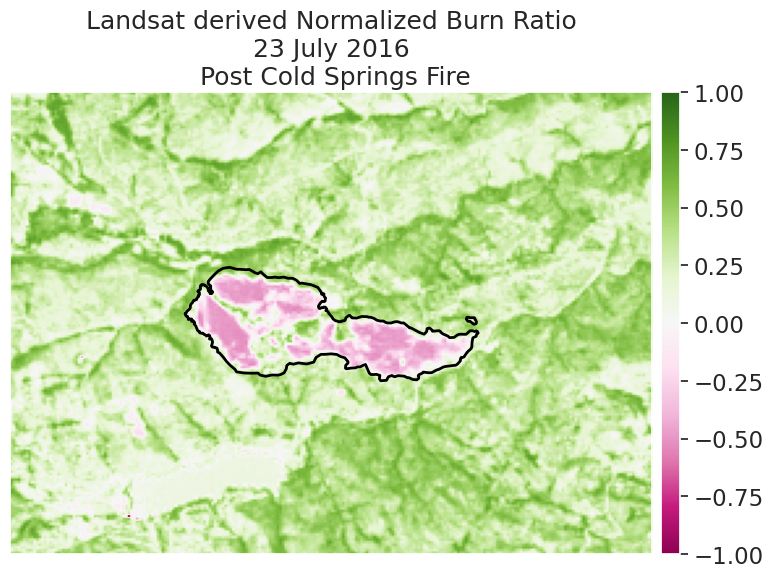

In [5]:
landsat_postfire_nbr = (
    landsat_post_fire[0]-landsat_post_fire[2]) / (landsat_post_fire[0]+landsat_post_fire[2])

fig, ax = plt.subplots(figsize=(12, 6))

ep.plot_bands(landsat_postfire_nbr,
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              ax=ax,
              extent=extent_landsat,
              title="Landsat derived Normalized Burn Ratio\n 23 July 2016 \n Post Cold Springs Fire")

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='black',
                       linewidth=2)
plt.show()

In [37]:
all_landsat_bands_path = glob(os.path.join("cold-springs-fire",
                                           "landsat_collect",
                                           "LC080340322016070701T1-SC20180214145604",
                                           "crop",
                                           "*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_pre_fire = combine_tifs(all_landsat_bands_path)

extent_landsat = plotting_extent(
    landsat_pre_fire[0].values, landsat_pre_fire.rio.transform())

landsat_prefire_nbr = (
    landsat_pre_fire[0]-landsat_post_fire[2]) / (landsat_pre_fire[0]+landsat_pre_fire[2])

In [38]:
landsat_pre_fire.shape == landsat_post_fire.shape

True

In [39]:
dnbr_landsat = landsat_pre_fire - landsat_postfire_nbr
dnbr_landsat

<xarray.DataArray (band: 3, y: 177, x: 246)> Size: 523kB
array([[[2079.8796 , 1941.9313 , 1949.9293 , ..., 1747.4729 ,
         1801.5148 , 2134.493  ],
        [2299.7224 , 2044.861  , 1938.8765 , ..., 1715.5454 ,
         1782.581  , 2130.5981 ],
        [2581.602  , 2442.6577 , 2346.6719 , ..., 1835.5769 ,
         2001.6497 , 2240.6816 ],
        ...,
        [2075.7805 , 1992.766  , 2144.805  , ..., 1913.6749 ,
         2065.6401 , 2165.6587 ],
        [1909.9205 , 1898.7695 , 1961.7043 , ..., 1786.6792 ,
         2037.6097 , 2299.5635 ],
        [1632.5964 , 1610.5834 , 1737.5638 , ..., 1713.773  ,
         1847.6998 , 2193.619  ]],

       [[2082.8796 , 1984.9313 , 1926.9293 , ..., 1010.4729 ,
         1150.5148 , 1250.4928 ],
        [1895.7223 , 1931.861  , 1844.8765 , ..., 1129.5454 ,
         1239.581  , 1504.5983 ],
        [1886.6019 , 1770.6576 , 1671.6719 , ..., 1282.5769 ,
         1560.6497 , 1792.6815 ],
...
        [1941.7805 , 1682.766  , 1884.8048 , ..., 1588.6749 ,
         1538.64   , 1607.6586 ],
        [1864.9205 , 1849.7695 , 1571.7043 , ..., 1552.6792 ,
         1506.6097 , 1559.5636 ],
        [1198.5964 ,  993.5834 , 1112.5638 , ..., 1655.773  ,
         1664.6998 , 1714.6189 ]],

       [[1442.8798 , 1386.9313 , 1282.9293 , ...,  575.4729 ,
          674.51483,  695.4928 ],
        [1197.7223 , 1273.861  , 1182.8765 , ...,  656.5455 ,
          737.5811 ,  906.59827],
        [1107.6019 , 1035.6576 ,  982.6718 , ...,  758.5769 ,
          948.64966, 1146.6815 ],
        ...,
        [1540.7805 , 1243.766  , 1358.8048 , ..., 1011.67487,
          918.6401 ,  988.6586 ],
        [1374.9205 , 1601.7695 , 1244.7043 , ..., 1001.67926,
          941.6097 ,  928.5636 ],
        [ 893.5965 ,  618.5834 ,  692.5638 , ..., 1057.773  ,
         1043.6998 , 1055.6189 ]]], dtype=float32)
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

In [11]:
dnbr_class_bins = [-np.inf, -.1, .1, .27, .66, np.inf]

dnbr_landsat_class = xr.apply_ufunc(np.digitize,
                                    dnbr_landsat,
                                    dnbr_class_bins)
dnbr_landsat_class

<xarray.DataArray (band: 3, y: 177, x: 246)> Size: 1MB
array([[[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]],

       [[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]],

       [[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]]])
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

In [44]:
dnbr_cat_names = ["Enhanced Regrowth",
                  "Unburned",
                  "Low Severity",
                  "Moderate Severity",
                  "High Severity"]

nbr_colors = ["g","yellowgreen","peachpuff","coral","maroon"]

nbr_cmap = ListedColormap(nbr_colors)

ValueError: plot_bands expects the number of plot titles to equal the number of array raster layers.

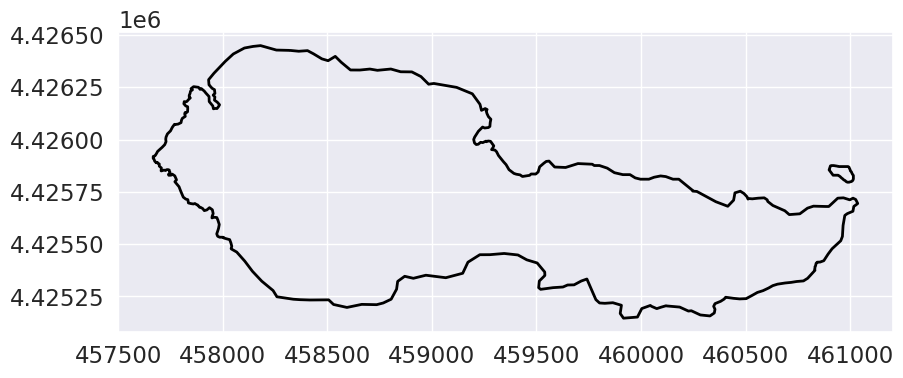

In [45]:
dnbr_landsat_class_plot = ma.masked_array(
    dnbr_landsat_class.values, dnbr_landsat_class.isnull())

fig, ax = plt.subplots(figsize=(10, 8))

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='black',
                       linewidth=2)

classes = np.unique(dnbr_landsat_class_plot)
classes = classes.tolist()[:5]

ep.plot_bands(dnbr_landsat_class_plot,
              cmap=nbr_cmap,
              vmin=1,
              vmax=5,
              title="Landsat dNBR - Cold Spring Fire Site \n June 22, 2016 - July 24, 2016",
              cbar=False,
              scale=False,
              extent=extent_landsat,
              ax=ax)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes,
               titles=dnbr_cat_names)

plt.show()

In [42]:
values = np.unique(dnbr_landsat_class).tolist()

values = [0] + values

nbr_colors = ["g", "yellowgreen", "peachpuff", "coral", "maroon"]
nbr_cmap = ListedColormap(nbr_colors)

bounds = [((a + b) / 2) for a, b in zip(values[:-1], values[1::1])] + [5.5]

norm = colors.BoundaryNorm(bounds, nbr_cmap.N)

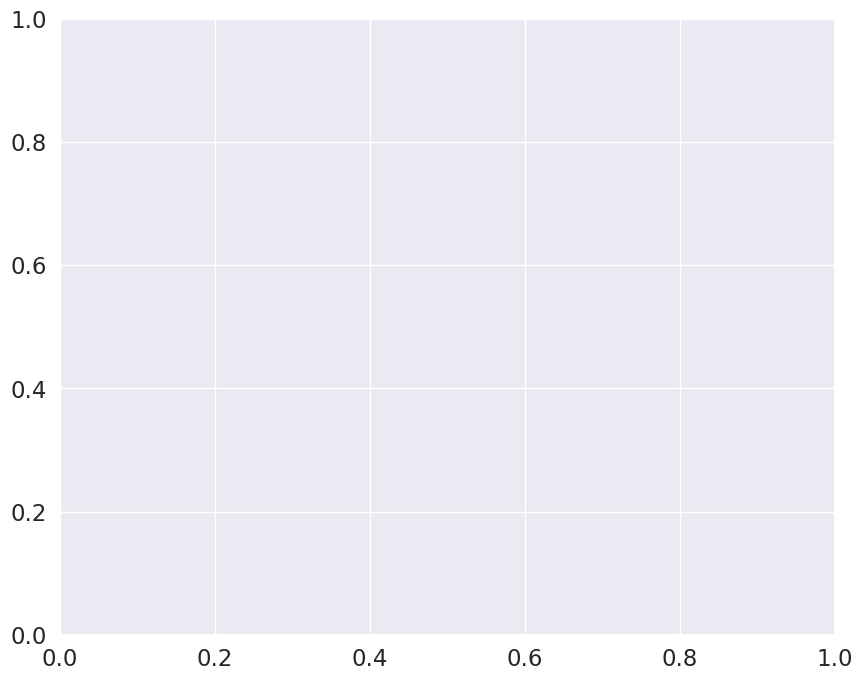

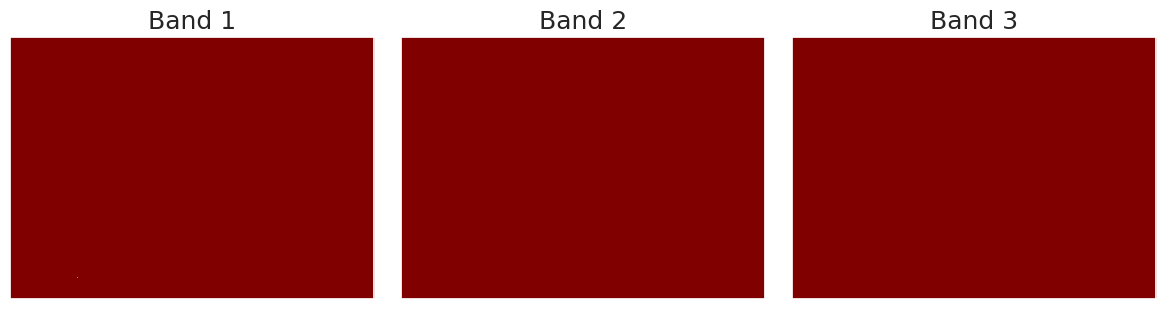

IndexError: list index out of range

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

ep.plot_bands(dnbr_landsat_class,
              ax=ax,
              cmap=nbr_cmap,
              norm=norm,
              cbar=False)

cbar = ep.colorbar(ax.get_images()[0])

cbar.set_ticks([np.unique(dnbr_landsat_class)])
cbar.set_ticklabels(dnbr_cat_names)
ax.set_title("Landsat dNBR - Cold Spring Fire Site \n June 22, 2017 - July 24, 2017",
             fontsize=16)

ax.set_axis_off()
plt.show()

In [25]:
landsat_pixel = landsat_pre_fire.rio.resolution(
)[0] * landsat_pre_fire.rio.resolution()[0]

burned_landsat = (dnbr_landsat_class == 5).sum()
burned_landsat = np.multiply(burned_landsat, landsat_pixel).values

print("Landsat Severe Burn Area:", burned_landsat)

Landsat Severe Burn Area: 117562500.0


In [26]:
dnbr_path = os.path.join("cold-springs-fire", "outputs", "dnbr_landsat.tif")

dnbr_landsat_class.rio.to_raster(dnbr_path, dtype="int8")

rxr.open_rasterio(dnbr_path).squeeze()

<xarray.DataArray (band: 3, y: 177, x: 246)> Size: 131kB
[130626 values with dtype=int8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0